In [1]:
import scipy
import wave
import numpy as np
import glob
import seaborn as sns
import pandas as pd
from pydub import AudioSegment
from matplotlib import pyplot as plt

In [9]:
filename = "MusicDataset/genres/blues/blues.00000.wav"

In [2]:
redefile = wave.open(filename)

NameError: name 'filename' is not defined

In [ ]:
wave.close()

In [14]:
data = redefile.readframes(redefile.getnframes())

In [16]:
x = np.frombuffer(data,dtype="int16") / float((2^15))

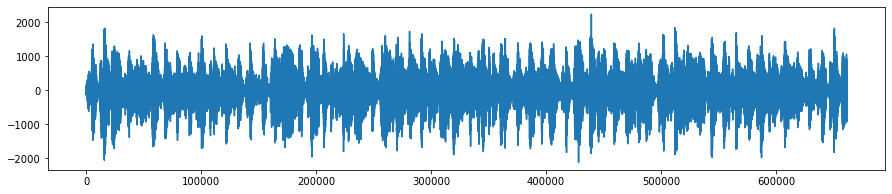

In [21]:
#音声波形表示
plt.figure(figsize=(15,3))
plt.plot(x)
plt.show()

In [22]:
print(redefile.getnframes()/redefile.getframerate())

30.013333333333332


In [5]:
music_list = ["country","metal","rock","classical","hiphop","jazz","reggae","blues","disco","pop"]

In [6]:
def CreateSpectrogram(sample):
    ampList = []
    argList = []
    w = 1000
    s = 500
    
    for i in range(int((sample.shape[0]- w) / s)):
        data = sample[i*s:i*s + w]
        spec = np.fft.fft(data)
        spec = spec[:int(spec.shape[0]/2)]
        spec[0] = spec[0] / 2
        ampList.append(np.abs(spec))
        argList.append(np.angle(spec))

    #周波数は共通なので１回だけ計算（縦軸表示に使う）  
    freq = np.fft.fftfreq(data.shape[0], 1.0/sound.frame_rate)
    freq = freq[:int(freq.shape[0]/2)]

    #時間も共通なので１回だけ計算（横軸表示に使う）
    time = np.arange(0, i+1, 1) * s / sound.frame_rate

    #numpyの配列にしておく
    ampList = np.array(ampList)
    argList = np.array(argList)
        
    return ampList, time, freq

In [ ]:
for i in music_list:
    list_ = []
    url_file = "MusicDataset/genres/" + i + "/*"
    list_ = glob.glob(url_file)
    
    for j in list_:
        sound = AudioSegment.from_file(j,".wav")
        samples = np.array(sound.get_array_of_samples())
        Sample = samples[::sound.channels]
        AmpList, time, freq = CreateSpectrogram(Sample)

        df_amp = pd.DataFrame(data=AmpList, index=time, columns=freq)
        #seabornのheatmapを使う
        plt.figure(figsize=(20, 6))
        sns.heatmap(data=np.log(df_amp.iloc[:, :100].T), 
                    xticklabels=100, 
                    yticklabels=10, 
                    cmap=plt.cm.gist_rainbow_r,
                   )

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
